# Background

This notebook will be exploring the viability of the dataset for use in ML through KNN, LR, & SVM. The reference for this ML Test is found in this [GitHub link](https://github.com/jm55/CSINTSY-MCO-5/blob/main/Machine%20Learning/notebook-v2.2.ipynb).

# Importing Libraries

In [284]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.model_selection as model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn import svm

train_timers = []
predict_timers = []
train_mem = []
predict_mem = []

# Importing Datasets

Note that these datasets that are being used are the ones already pre-processed by the notebook: `[Datasets] - Thesis Notebook.ipynb`

## 0. Reference APIs

For use later when transforming data from string APIs to numeric form to be compatible for use in ML training.

In [2]:
def getAPIs():
    apis = pd.read_csv('CombinedAPIs.csv', low_memory=False)
    apis = apis['api'].to_list()
    apis.append('nan') #Take note of this
    return apis

apis = getAPIs()

## 1. MalbehavD Dataset

In [3]:
malbehavd = pd.read_csv('MalbehavD-V1.csv', low_memory=False)
malbehavd.head()

,sha256,malware,0,1,2,3,4,5,6,7,...,165,166,167,168,169,170,171,172,173,174
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Catak Dataset

In [4]:
catak = pd.read_csv('Catak.csv', low_memory=False)
catak.head()

,malware_type,malware,0,1,2,3,4,5,6,7,...,156,157,158,159,160,161,162,163,164,165
0,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Trojan,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Backdoor,1,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Backdoor,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Oliveira Dataset

In [5]:
oliveira = pd.read_csv('Oliveira.csv', low_memory=False)
oliveira.head()

,hash,malware,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,071e8c3f8922e186e57548cd4c703a5d,1,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,WSAAccept,NtCreateSection,Process32NextW,recvfrom,...,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData,OleInitialize,FindFirstFileExW,GetComputerNameW
1,33f8e6d08a6aae939f25a8e0d63dd523,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,FindResourceW,GetFileType,RemoveDirectoryW,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData
2,b68abd064e975e1c6d5f25e748663076,1,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,...,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestW,HttpSendRequestA
3,72049be7bd30ea61297ea624ae198067,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,Process32NextW,OleInitialize,setsockopt,OleInitialize,setsockopt,NtQueryKey,OleInitialize,setsockopt,RegEnumValueA,setsockopt
4,c9b3700a77facf29172f32df6bc77f48,1,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,...,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,LookupAccountSidW,SetStdHandle,LookupAccountSidW,SetStdHandle


## 1. Determine features

Determine what features, or for our case, behaviors are associated in each ith API call of the executable.

### 1.1 Preview Features

In [6]:
malbehavd_feats = []
for i in range(malbehavd.shape[1]-2):
    malbehavd_feats.append(str(i))
malbehavd[malbehavd_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileVersionInfoSizeW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,NtQueryValueKey,RegCloseKey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,RegQueryValueExW,NtMapViewOfSection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,NtQueryAttributesFile,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
catak_feats = []
for i in range(catak.shape[1]-2):
    catak_feats.append(str(i))
catak[catak_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,LdrLoadDll,GetSystemInfo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,NtCreateFile,SetFilePointer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,RegSetValueExA,NtCreateFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
oliveira_feats = []
for i in range(oliveira.shape[1]-2):
    oliveira_feats.append(str(i))
oliveira[oliveira_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,WSAAccept,NtCreateSection,Process32NextW,recvfrom,GetFileAttributesW,OleInitialize,...,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData,OleInitialize,FindFirstFileExW,GetComputerNameW
1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,FindResourceW,GetFileType,RemoveDirectoryW,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData
2,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,...,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestW,HttpSendRequestA
3,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,Process32NextW,OleInitialize,setsockopt,OleInitialize,setsockopt,NtQueryKey,OleInitialize,setsockopt,RegEnumValueA,setsockopt
4,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,NtLoadKey,...,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,LookupAccountSidW,SetStdHandle,LookupAccountSidW,SetStdHandle


### 1.2 Converting string features to int features

The technique to be used here will be LabelEncoder.

Basically what it does it converts string API calls to numeric equivalent.

This however means that the deployed model will require on the 'transformed' values as per the APIs listed in the `CombinedAPIs.csv` with an included `'nan'` value which is referred to in the notebook as `apis`.

#### 1.2.1 Preparing LabelEncoder

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(apis)

LabelEncoder()

#### 1.2.2 MalbehavD

In [10]:
for f in malbehavd_feats:
    malbehavd[f] = pd.Series(le.fit_transform(malbehavd[f]))
X = malbehavd[malbehavd_feats]
malbehavd[malbehavd_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,26,2,65,52,29,31,44,37,63,31,...,1,1,1,1,1,1,1,1,1,1
1,35,19,65,9,78,92,46,1,85,98,...,1,1,1,1,1,1,1,1,1,1
2,14,7,26,35,34,77,94,22,105,73,...,1,1,1,1,1,1,1,1,1,1
3,39,31,35,95,66,43,85,54,62,48,...,1,1,1,1,1,1,1,1,1,1
4,26,23,60,94,104,83,56,53,81,48,...,1,1,1,1,1,1,1,1,1,1


#### 1.2.3 Catak

In [11]:
for f in catak_feats:
    catak[f] = pd.Series(le.fit_transform(catak[f]))
X = catak[catak_feats]
catak[catak_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,27,32,87,66,71,84,64,75,49,61,...,6,3,4,3,2,2,2,2,1,1
1,19,39,54,41,45,118,67,54,46,38,...,6,3,4,3,2,2,2,2,1,1
2,25,32,22,2,99,109,106,96,57,121,...,6,3,4,3,2,2,2,2,1,1
3,27,32,87,66,71,84,64,75,49,61,...,6,3,4,3,2,2,2,2,1,1
4,27,32,106,55,99,101,106,4,108,63,...,6,3,4,3,2,2,2,2,1,1


#### 1.2.4 Oliveira

In [12]:
for f in oliveira_feats:
    oliveira[f] = pd.Series(le.fit_transform(oliveira[f]))
X = oliveira[oliveira_feats]
oliveira[oliveira_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,36,74,54,68,108,71,91,123,32,88,...,73,41,177,83,103,126,23,128,34,40
1,22,54,62,65,71,54,75,52,76,53,...,35,49,143,72,42,174,85,110,135,23
2,3,32,75,43,92,54,97,52,96,53,...,77,39,72,77,39,68,79,41,73,69
3,22,54,62,65,71,54,75,52,76,53,...,129,122,180,126,182,109,128,185,141,177
4,22,63,42,74,51,98,56,96,55,76,...,26,123,153,26,125,152,88,159,90,152


## 2. Determine labels

Determine what are the different labels that the combined features will result into. For this case, it will be either malicious (1) or not malicious (0).

In [13]:
y = malbehavd['malware'].to_numpy()
labels = malbehavd['malware'].unique()
print("MalbehavD - No. of unique labels: ", labels.size)
print(labels)

MalbehavD - No. of unique labels:  2
[0 1]


In [14]:
y = catak['malware'].to_numpy()
labels = catak['malware'].unique()
print("Catak - No. of unique labels: ", labels.size)
print(labels)

Catak - No. of unique labels:  1
[1]


In [15]:
y = oliveira['malware'].to_numpy()
labels = oliveira['malware'].unique()
print("Oliviera - No. of unique labels: ", labels.size)
print(labels)

Oliviera - No. of unique labels:  2
[1 0]


## 3. Dataset Selector
To automate the selection process as suppose to hard-coding changes, a dataset selector is made.

Simply change the input parameter for the `dataset_selector(dataset:int)`. The choices are:
- 0 - MalbehavD
- 1 - Catak
- 2 - Oliveira

In [16]:
def dataset_selector(dataset:int):
    if dataset == 0:
        return malbehavd[malbehavd_feats], malbehavd['malware'].to_numpy()
    elif dataset == 1:
        return catak[catak_feats], catak['malware'].to_numpy()
    elif dataset == 2:
        return oliveira[oliveira_feats], oliveira['malware'].to_numpy()
X, y = dataset_selector(2)

## 3. Divide Training Data from Test Data

Divide the dataset into training and test data. For this test, it will be divided into 80:20 for train:test respectively.

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.20, random_state=1)

In [18]:
cr = [] #Classification reports list; Entries as ['algo_label',algo_cr]
cm = [] #Confusion matrices list; Entries as ['algo_label', algo_cf]

# ML Proper

### ML Algorithms used:
1. K-Nearest Neighbors (KNN)
2. Logistic Regression (LR)
3. Decision Tree (DT/DTC)
4. Support Vector Machine (SVM)*
5. Random Forest (RF)*
6. Gaussian Naive Bayes (GNB)*
7. AdaBoost*
8. Multi-layer Perceptron (MLP)*

*Newly Implemented

AdaBoost, despite being a boosted model like XGBoost and LGBM, is actually an old boosted model, being created way back in 1995. For reference here is the summary table of the different known boosted ML algorithms:

| Algorithm                      | AdaBoost                    | XGBoost                     | CatBoost                                    | LightGBM                    |
|--------------------------------|-----------------------------|-----------------------------|---------------------------------------------|-----------------------------|
| Year                           | 1995                        | 2014                        | 2017                                        | 2017                        |
| Handling Categorical Variables | No (Conversion is required) | No (Conversion is required) | Automatically handles categorical variables | No (Conversion is required) |
| Memory Usage                   | Low                         | Moderate                    | High                                        | Low                         |
| Parallel Processing            | No                          | Yes                         | Yes                                         | Yes                         |
| GPU Support                    | No                          | Yes                         | Yes                                         | Yes                         |
| Regularization                 | No                          | Yes                         | Yes                                         | Yes                         |
| Speed/Scalability              | Fast                        | Fast                        | Moderate                                    | Fast                        |

### Reference:
- [Boosted Algorithms](https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/)
- [SciKit Learn](https://scikit-learn.org/stable/supervised_learning.html)

## 4. K-Nearest Neighbors

### 4.1 Load and 'Train' K Neighbors Classifier Model

**Reference:**

Munaga, H., & Jarugumalli, V. (2012). *Performance Evaluation: Ball-Treeand KD-Tree in the Context of MST*. In V. V. Das, E. Ariwa, & S. B. Rahayu (Eds.), Signal Processing and Information Technology (Vol. 62, pp. 225–228). Springer Berlin Heidelberg. https://doi.org/10.1007/978-3-642-32573-1_38

In [19]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='auto', leaf_size=10, p=2, 
                           metric='euclidean', metric_params=None, 
                           n_jobs=-1) #default: neighbors = 5, p = 2, leaf size = 30
startTime = time.time()
knn.fit(X,y)
train_timers.append(["KNN Tuned: ", time.time()-startTime])

### 4.2. Test Predictions

In [20]:
startTime = time.time()
y_pred = knn.predict(X_test)
predict_timers.append(["KNN Tuned: ", time.time()-startTime])

### 4.3 Create Classifier Report

In [21]:
knn_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['KNN', knn_cr])
print(knn_cr)

              precision    recall  f1-score   support

           0     0.9954    0.9600    0.9774       225
           1     0.9989    0.9999    0.9994      8551

    accuracy                         0.9989      8776
   macro avg     0.9972    0.9799    0.9884      8776
weighted avg     0.9989    0.9989    0.9989      8776



### 4.4 K-NN Confusion Matrix

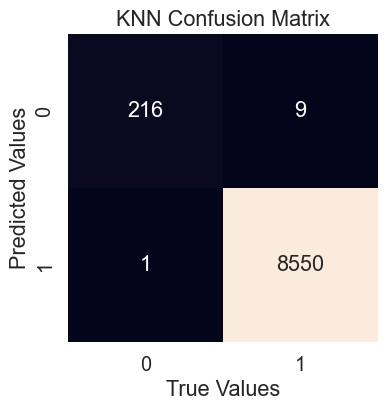

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
knn_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['KNN', knn_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("KNN Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 5. Decision Trees Classifier (DTC)

### 5.1. Load and 'Train' Decision Tree Classifier Model

In [23]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features=None, random_state=1, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             class_weight=None, ccp_alpha=0.0) #default: no max depth
startTime = time.time()
dtc.fit(X,y)
train_timers.append(["DTC Tuned: ", time.time()-startTime])

### 5.2. Plot Decision Tree

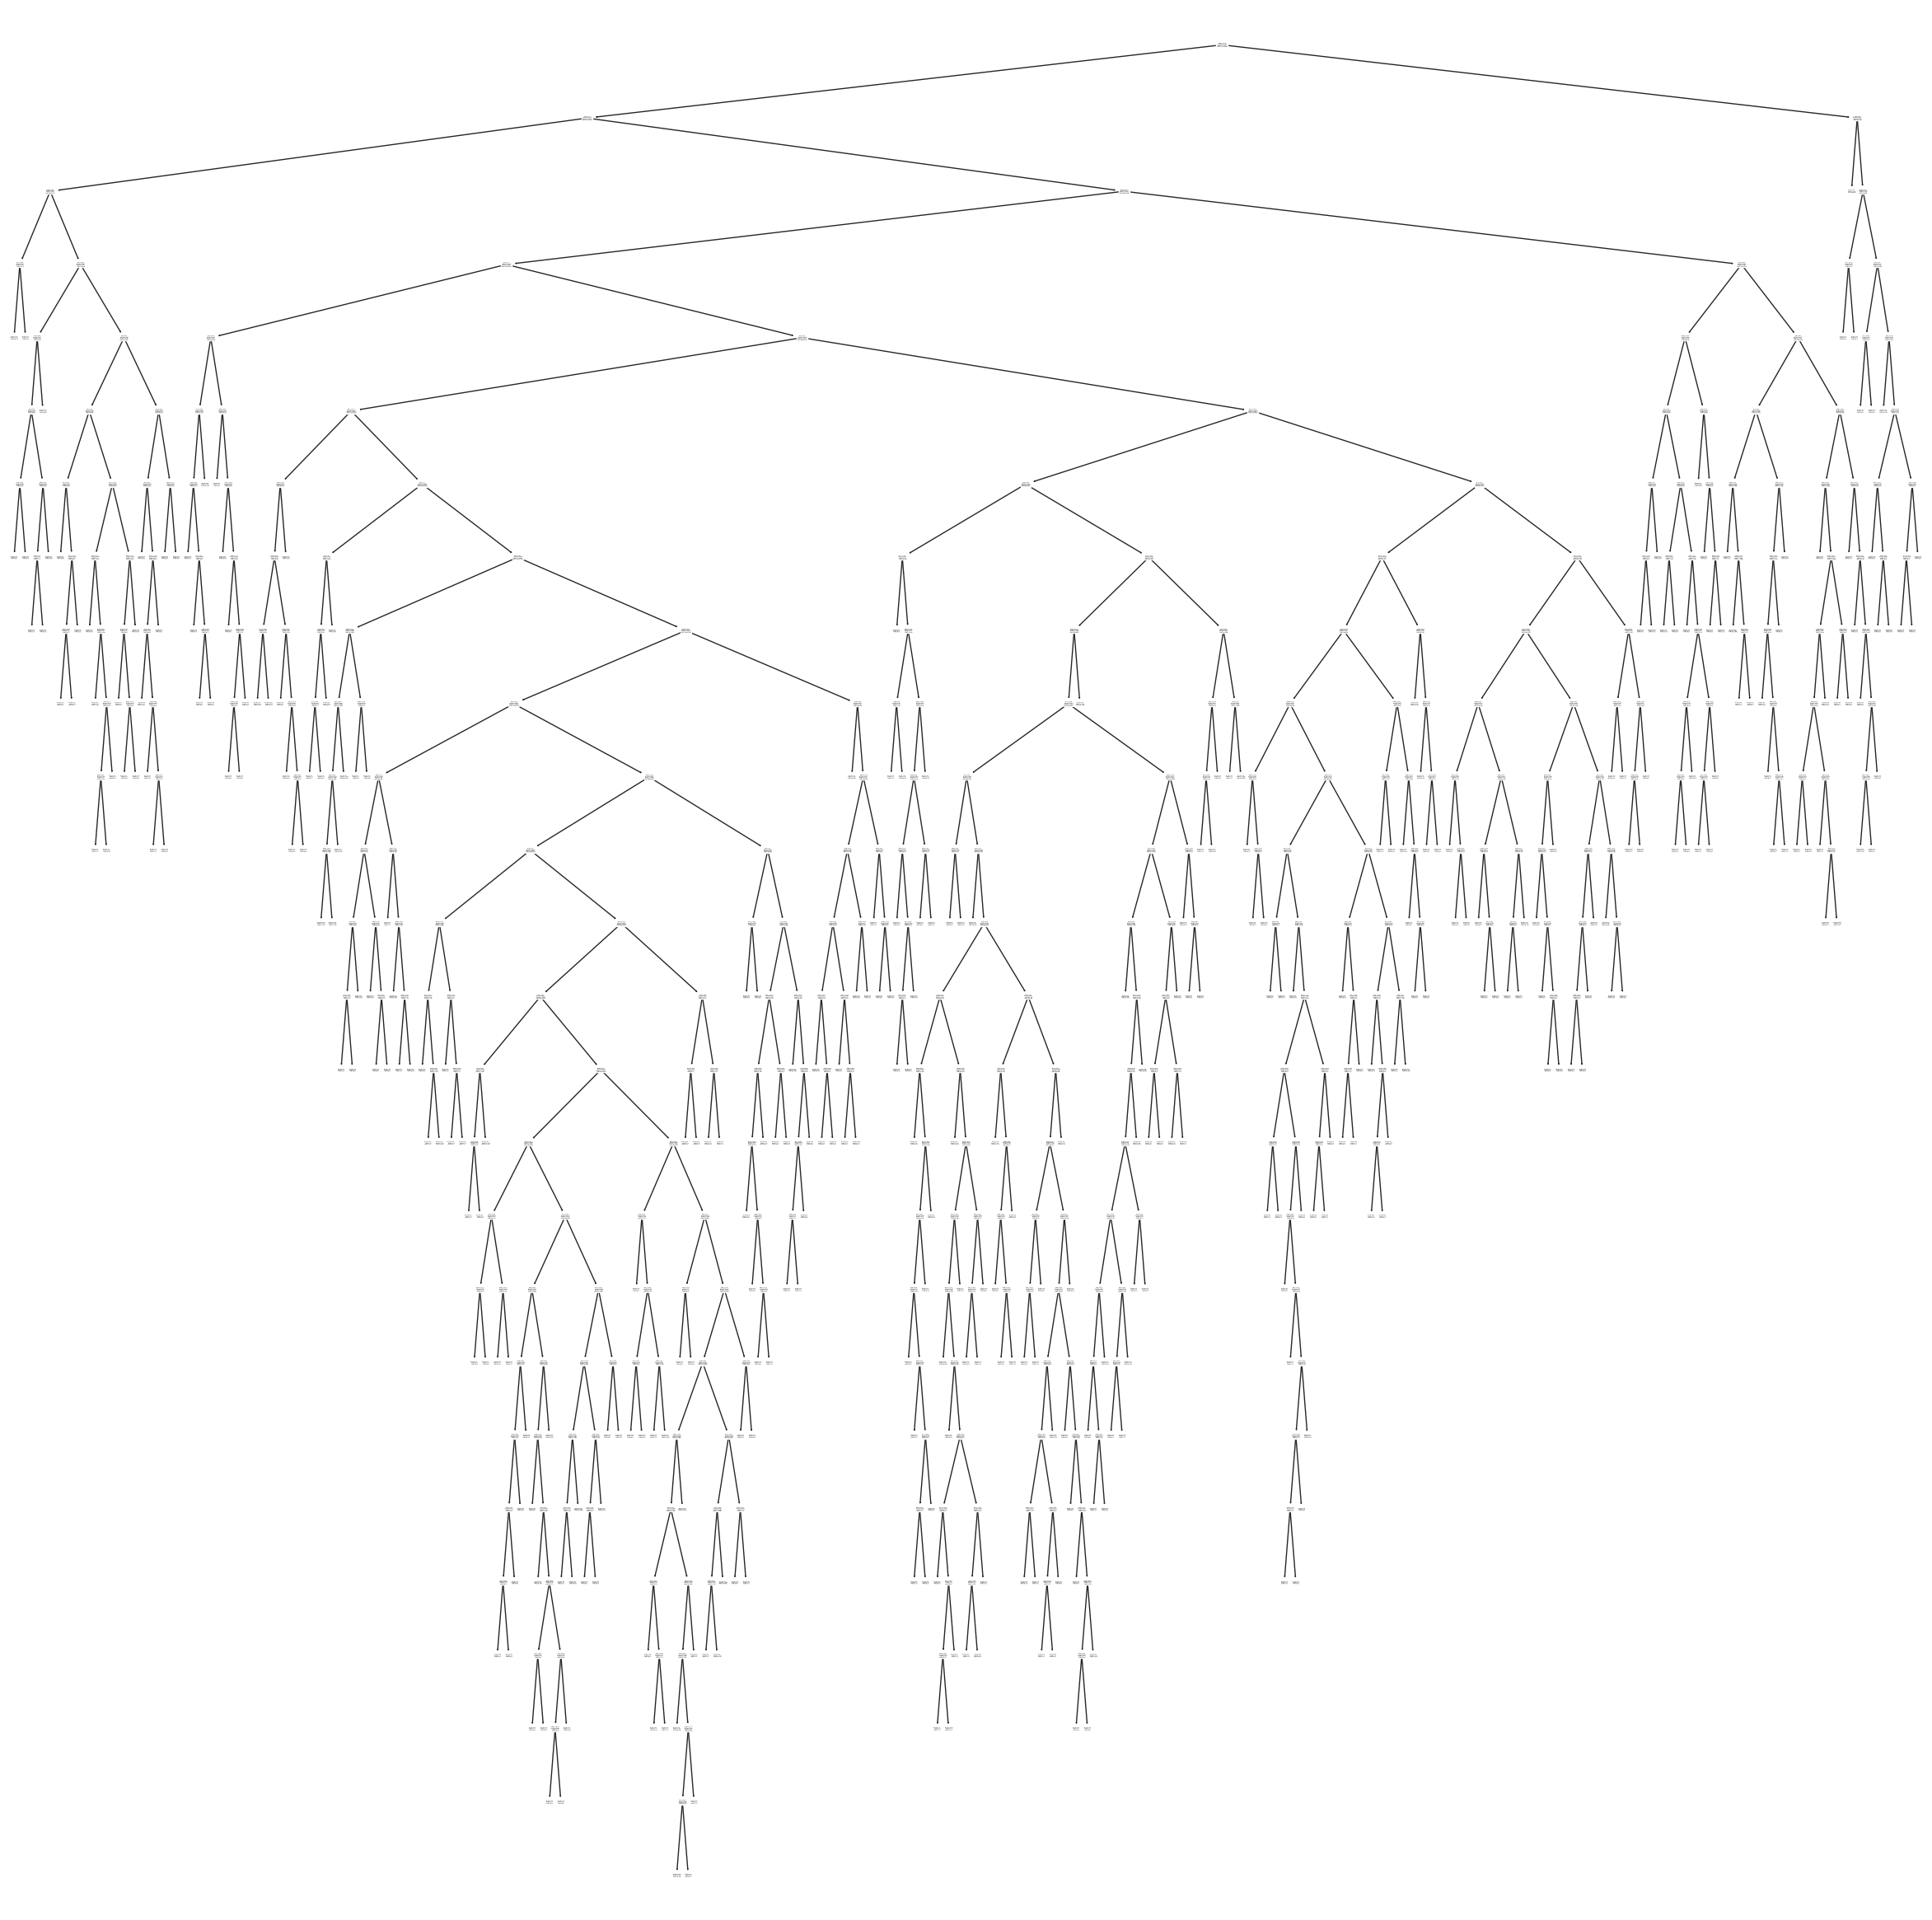

In [24]:
plt.figure(figsize=(30, 30))
plot_tree(dtc)
plt.show()

### 5.3. Test Predictions

In [25]:
startTime = time.time()
y_pred = dtc.predict(X_test)
predict_timers.append(["DTC Tuned: ", time.time()-startTime])

### 5.4. Create Classifier Report

In [26]:
dtc_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['DTC', dtc_cr])
print(dtc_cr)

              precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       225
           1     0.9989    1.0000    0.9995      8551

    accuracy                         0.9990      8776
   macro avg     0.9995    0.9800    0.9895      8776
weighted avg     0.9990    0.9990    0.9990      8776



### 5.5. DTC Confusion Matrix

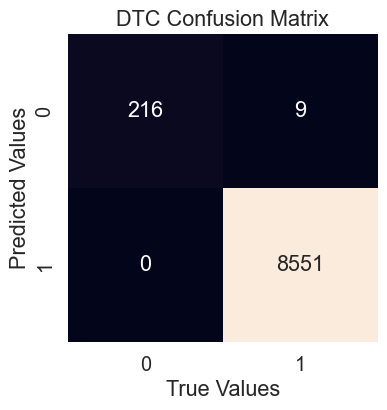

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
dtc_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['DTC', dtc_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("DTC Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 6. Logistic Regression

### 6.1. Load and 'Train' Logistic Regression Classifier Model

In [379]:
lr = LogisticRegression(penalty='l2', tol=0.00001, C=1, fit_intercept=True, 
                        intercept_scaling=1, class_weight=None, random_state=1, solver='newton-cholesky', 
                        max_iter=100000, multi_class='auto', False, warm_start=False, n_jobs=-1) #default: solver = lbfgs
startTime = time.time()
lr.fit(X, y)
train_timers.append(["LR Tuned: ", time.time()-startTime])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished


### 6.2. Test Predictions

In [380]:
startTime = time.time()
y_pred = lr.predict(X_test)
predict_timers.append(["LR Tuned: ", time.time()-startTime])

### 6.3. Create Classification Report

In [381]:
lr_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['LR', lr_cr])
print(lr_cr)

              precision    recall  f1-score   support

           0     0.8061    0.3511    0.4892       225
           1     0.9832    0.9978    0.9904      8551

    accuracy                         0.9812      8776
   macro avg     0.8946    0.6744    0.7398      8776
weighted avg     0.9786    0.9812    0.9776      8776



### 6.4. LR Confusion Matrix

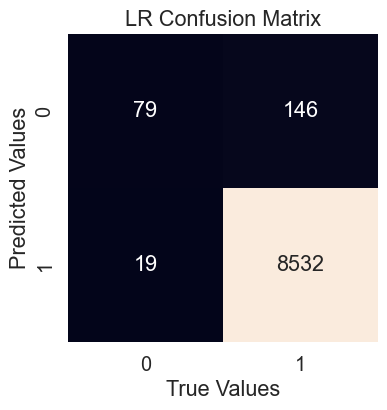

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
lr_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['LR', lr_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("LR Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 7. Support Vector Machine (SVM)*

### 7.1. Load and 'Train' SVM Classifier Model

**Reference:**
https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html

In [399]:
from sklearn.svm import SVC as SVM
svm = SVM(C=1.0, kernel='poly', degree=2, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.00001, cache_size=512, class_weight=None, verbose=False, 
          max_iter=-1, random_state=1)
startTime = time.time()
svm.fit(X, y)
train_timers.append(["SVM Tuned: ", time.time()-startTime])

### 7.2. Test Predictions

In [400]:
startTime = time.time()
y_pred = svm.predict(X_test)
predict_timers.append(["SVM Tuned: ", time.time()-startTime])

### 7.3. Create Classification Report

In [401]:
svm_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['SVM', svm_cr])
print(svm_cr)

              precision    recall  f1-score   support

           0     1.0000    0.9556    0.9773       225
           1     0.9988    1.0000    0.9994      8551

    accuracy                         0.9989      8776
   macro avg     0.9994    0.9778    0.9883      8776
weighted avg     0.9989    0.9989    0.9988      8776



### 7.4. SVM Confusion Matrix

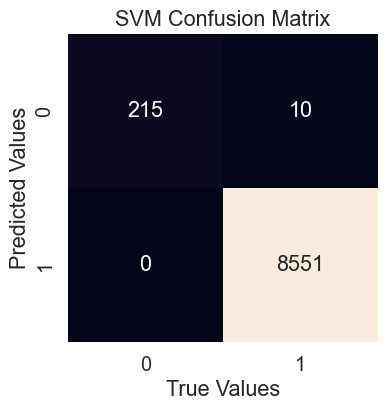

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
svm_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['SVM', svm_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("SVM Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 8. Random Forest*

### 8.1. Load and 'Train' RF Classifier Model

In [414]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators=100, criterion='log_loss', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, n_jobs=-1, random_state=1, verbose=False, 
        warm_start=False, class_weight=None, ccp_alpha=0.00, max_samples=None)
startTime = time.time()
rf.fit(X, y)
train_timers.append(["RF Tuned: ", time.time()-startTime])

### 8.2. Test Predictions

In [415]:
startTime = time.time()
y_pred = rf.predict(X_test)
predict_timers.append(["RF Tuned: ", time.time()-startTime])

### 8.3. Create Classification Report

In [416]:
rf_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['RF', rf_cr])
print(rf_cr)

              precision    recall  f1-score   support

           0     1.0000    0.9556    0.9773       225
           1     0.9988    1.0000    0.9994      8551

    accuracy                         0.9989      8776
   macro avg     0.9994    0.9778    0.9883      8776
weighted avg     0.9989    0.9989    0.9988      8776



### 8.4. RF Confusion Matrix

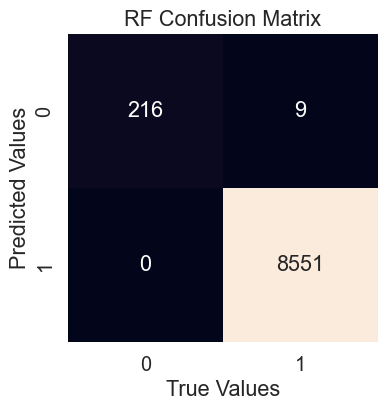

In [170]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
rf_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['RF', rf_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("RF Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 9. GNB*

### 9.1. Load and 'Train' GNB Classifier Model

In [209]:
from sklearn.naive_bayes import GaussianNB as GNB

gnb = GNB(priors=None, var_smoothing=0.000000001)
startTime = time.time()
gnb.fit(X, y)
train_timers.append(["GNB Tuned: ", time.time()-startTime])

### 9.2. Test Predictions

In [210]:
startTime = time.time()
y_pred = gnb.predict(X_test)
predict_timers.append(["GNB Tuned: ", time.time()-startTime])

### 9.3. Create Classification Report

In [211]:
gnb_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['GNB', gnb_cr])
print(gnb_cr)

              precision    recall  f1-score   support

           0     0.1166    0.4489    0.1852       225
           1     0.9843    0.9105    0.9460      8551

    accuracy                         0.8987      8776
   macro avg     0.5505    0.6797    0.5656      8776
weighted avg     0.9621    0.8987    0.9265      8776



### 9.4. GNB Confusion Matrix

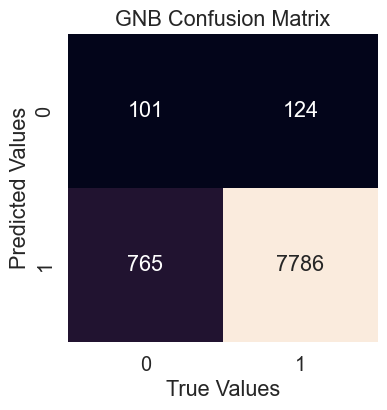

In [203]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
gnb_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['GNB', gnb_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("GNB Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 10. AdaBoost*

### 10.1. Load and 'Train' AdaBoost Classifier Model

In [312]:
from sklearn.ensemble import AdaBoostClassifier as ADA

ada = ADA(estimator=None, n_estimators=5000, learning_rate=1.0, 
          algorithm='SAMME.R', random_state=1, base_estimator='deprecated')
startTime = time.time()
ada.fit(X, y)
train_timers.append(["AdaBoost Tuned: ", time.time()-startTime])

[['AdaBoost Tuned: ', 777.4736440181732], ['AdaBoost Tuned: ', 790.5372231006622], ['AdaBoost Tuned: ', 0.17205309867858887], ['AdaBoost Tuned: ', 1.5571980476379395], ['AdaBoost Tuned: ', 16.15018343925476], ['AdaBoost Tuned: ', 149.3751676082611], ['AdaBoost Tuned: ', 299.537734746933], ['AdaBoost Tuned: ', 818.3595023155212]]


### 10.2. Test Predictions

In [313]:
startTime = time.time()
y_pred = ada.predict(X_test)
predict_timers.append(["AdaBoost Tuned: ", time.time()-startTime])

### 10.3. Create Classification Report

In [314]:
ada_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['AdaBoost', ada_cr])
print(ada_cr)

              precision    recall  f1-score   support

           0     0.9907    0.9467    0.9682       225
           1     0.9986    0.9998    0.9992      8551

    accuracy                         0.9984      8776
   macro avg     0.9946    0.9732    0.9837      8776
weighted avg     0.9984    0.9984    0.9984      8776



### 10.4. AdaBoost Confusion Matrix

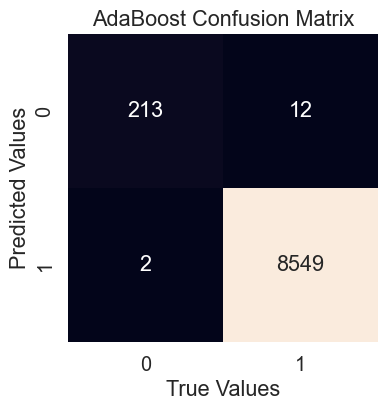

In [315]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
ada_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['AdaBoost', ada_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 11. MLP*

*Sort of a Neural Network like ML model.*

### 11.1. Load and 'Train' MLP Classifier Model

In [485]:
from sklearn.neural_network import MLPClassifier as MLP

mlp = MLP(hidden_layer_sizes=(500,), activation='relu', solver='adam', alpha=0.001, batch_size='auto', 
          learning_rate='adaptive', learning_rate_init=0.001, max_iter=1000, shuffle=True, 
          random_state=1, tol=0.00001, verbose=False, warm_start=False, momentum=0.9, 
          nesterovs_momentum=True, beta_1=0.9, beta_2=0.999, 
          epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
startTime = time.time()
mlp.fit(X, y)
train_timers.append(["MLP Tuned: ", time.time()-startTime])

### 11.2. Test Predictions

In [483]:
startTime = time.time()
y_pred = mlp.predict(X_test)
predict_timers.append(["MLP Tuned: ", time.time()-startTime])

### 11.3. Create Classification Report

In [484]:
mlp_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['MLP', mlp_cr])
print(mlp_cr)

              precision    recall  f1-score   support

           0     0.9638    0.9467    0.9552       225
           1     0.9986    0.9991    0.9988      8551

    accuracy                         0.9977      8776
   macro avg     0.9812    0.9729    0.9770      8776
weighted avg     0.9977    0.9977    0.9977      8776



### 11.4. MLP Confusion Matrix

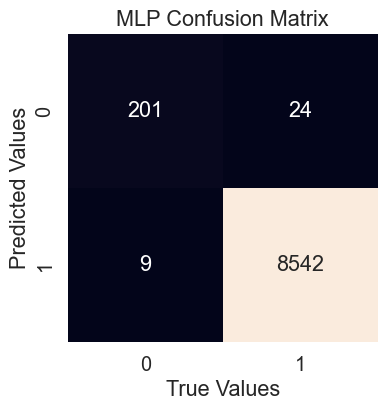

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
mlp_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['MLP', mlp_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("MLP Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 12. Gradient Tree Boosting

*The algorithm of the GTB model in SciKit Learn is inspired by LightGBM.*

### 12.1. Load and 'Train' GBT Classifier Model

In [526]:
from sklearn.ensemble import GradientBoostingClassifier as GBT

gbt = GBT(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=5, 
          min_impurity_decrease=0.0, init=None, random_state=1, max_features=None, verbose=False, 
          max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
          tol=0.000001, ccp_alpha=0.0)
startTime = time.time()
gbt.fit(X, y)
train_timers.append(["GBT Default: ", time.time()-startTime])

### 12.2. Test Predictions

In [527]:
startTime = time.time()
y_pred = gbt.predict(X_test)
predict_timers.append(["MLP Default: ", time.time()-startTime])

### 12.3. Create Classification Report

In [528]:
gbt_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['GBT', gbt_cr])
print(gbt_cr)

              precision    recall  f1-score   support

           0     0.9852    0.5911    0.7389       225
           1     0.9894    0.9998    0.9945      8551

    accuracy                         0.9893      8776
   macro avg     0.9873    0.7954    0.8667      8776
weighted avg     0.9892    0.9893    0.9880      8776



### 12.4. GBT Confusion Matrix

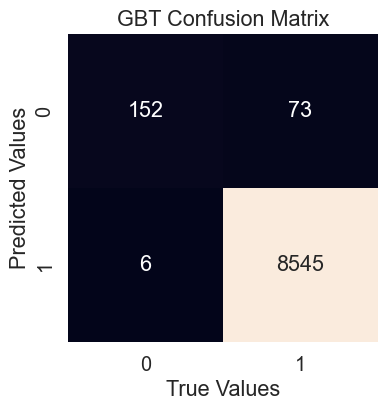

In [489]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
gbt_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['GBT', gbt_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("GBT Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 13. Comparison of Machine Learning Models

### 13.1 Using SkLearn's Classifier Report

In [52]:
for report in cr:
    print(report[0],"\n",report[1])

KNN 
               precision    recall  f1-score   support

           0     0.9954    0.9600    0.9774       225
           1     0.9989    0.9999    0.9994      8551

    accuracy                         0.9989      8776
   macro avg     0.9972    0.9799    0.9884      8776
weighted avg     0.9989    0.9989    0.9989      8776

DTC 
               precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       225
           1     0.9989    1.0000    0.9995      8551

    accuracy                         0.9990      8776
   macro avg     0.9995    0.9800    0.9895      8776
weighted avg     0.9990    0.9990    0.9990      8776

LR 
               precision    recall  f1-score   support

           0     0.8061    0.3511    0.4892       225
           1     0.9832    0.9978    0.9904      8551

    accuracy                         0.9812      8776
   macro avg     0.8946    0.6744    0.7398      8776
weighted avg     0.9786    0.9812    0.9776      8776

SV

### 13.2. Using Confusion Matrix

In [53]:
for matrix in cm:
    print(matrix[0],"\n",matrix[1])

KNN 
               precision    recall  f1-score   support

           0     0.9954    0.9600    0.9774       225
           1     0.9989    0.9999    0.9994      8551

    accuracy                         0.9989      8776
   macro avg     0.9972    0.9799    0.9884      8776
weighted avg     0.9989    0.9989    0.9989      8776

DTC 
               precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       225
           1     0.9989    1.0000    0.9995      8551

    accuracy                         0.9990      8776
   macro avg     0.9995    0.9800    0.9895      8776
weighted avg     0.9990    0.9990    0.9990      8776

LR 
               precision    recall  f1-score   support

           0     0.8061    0.3511    0.4892       225
           1     0.9832    0.9978    0.9904      8551

    accuracy                         0.9812      8776
   macro avg     0.8946    0.6744    0.7398      8776
weighted avg     0.9786    0.9812    0.9776      8776

SV

### 13.3. Using Stratified K-Folds Cross Validation comparision for ML Algorithms
For this example, StratifiedKFold will be used to as suppose to the normal K-Folds in order *"to ensure that relative class frequencies are effectively sustained in each train and validation fold when using stratified sampling rather than random sampling"*.

**Reference:**

Prusty, S., Patnaik, S., & Dash, S. K. (2022). *SKCV: Stratified K-fold cross-validation on ML classifiers for predicting cervical cancer*. Frontiers in Nanotechnology, 4. https://www.frontiersin.org/articles/10.3389/fnano.2022.972421

In [54]:
# kf will return list of indices for the train_index and test_index
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

kfold_results = []
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    sublist = [i]
    axis = 0 
    
    # Extract from the dataframe based on the given indeces
    training_set = np.take(X, train_index, axis)
    training_set_labels = np.take(y, train_index, axis)
    test_set = np.take(X, test_index, axis)
    test_set_labels = np.take(y, test_index, axis)

    knn.fit(training_set,training_set_labels)
    knn_pred = knn.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, knn_pred),4))
    print(f"Fold {i}: KNN Finished")
    
    dtc.fit(training_set,training_set_labels)
    dtc_pred = dtc.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, dtc_pred),4))
    print(f"Fold {i}: DTC Finished")
    
    lr.fit(training_set,training_set_labels)
    lr_pred = lr.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, lr_pred),4))
    print(f"Fold {i}: LR Finished")
    
    svm.fit(training_set,training_set_labels)
    svm_pred = svm.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, svm_pred),4))
    print(f"Fold {i}: SVM Finished")
    
    rf.fit(training_set,training_set_labels)
    rf_pred = rf.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, rf_pred),4))
    
    gnb.fit(training_set,training_set_labels)
    gnb_pred = gnb.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, gnb_pred),4))
    print(f"Fold {i}: GNB Finished")
    
    ada.fit(training_set,training_set_labels)
    ada_pred = ada.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, ada_pred),4))
    print(f"Fold {i}: AdaBoost Finished")
    
    mlp.fit(training_set,training_set_labels)
    mlp_pred = mlp.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, mlp_pred),4))
    print(f"Fold {i}: MLP Finished")
    
    kfold_results.append(sublist)
    print(f"Fold {i:0.0f} finished")

Fold 0: KNN Finished
Fold 0: DTC Finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished


Fold 0: LR Finished
Fold 0: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fold 0: GNB Finished
Fold 0: AdaBoost Finished
Iteration 1, loss = 1.04957536
Iteration 2, loss = 0.45123002
Iteration 3, loss = 0.31685595
Iteration 4, loss = 0.21144302
Iteration 5, loss = 0.24117195
Iteration 6, loss = 0.14421327
Iteration 7, loss = 0.13466658
Iteration 8, loss = 0.18237432
Iteration 9, loss = 0.12365475
Iteration 10, loss = 0.13362771
Iteration 11, loss = 0.16655095
Iteration 12, loss = 0.08563434
Iteration 13, loss = 0.14655486
Iteration 14, loss = 0.09107036
Iteration 15, loss = 0.12199823
Iteration 16, loss = 0.10267085
Iteration 17, loss = 0.08726644
Iteration 18, loss = 0.12003321
Iteration 19, loss = 0.09852132
Iteration 20, loss = 0.08341720
Iteration 21, loss = 0.10258134
Iteration 22, loss = 0.07612270
Iteration 23, loss = 0.07257173
Iteration 24, loss = 0.07111660
Iteration 25, loss = 0.10318773
Iteration 26, loss = 0.06917077
Iteration 27, loss = 0.05777090
Iteration 28, loss = 0.08654496
Iteration 29, loss = 0.07933149
Iteration 30, loss = 0.06363889
It

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished


Fold 1: LR Finished
Fold 1: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 1: GNB Finished
Fold 1: AdaBoost Finished
Iteration 1, loss = 1.07374340
Iteration 2, loss = 0.44436510
Iteration 3, loss = 0.27903433
Iteration 4, loss = 0.22438478
Iteration 5, loss = 0.14946123
Iteration 6, loss = 0.13455809
Iteration 7, loss = 0.13577972
Iteration 8, loss = 0.14591728
Iteration 9, loss = 0.24898679
Iteration 10, loss = 0.10965509
Iteration 11, loss = 0.16574663
Iteration 12, loss = 0.11485636
Iteration 13, loss = 0.09314640
Iteration 14, loss = 0.08985587
Iteration 15, loss = 0.08353163
Iteration 16, loss = 0.13462001
Iteration 17, loss = 0.09689353
Iteration 18, loss = 0.10760326
Iteration 19, loss = 0.09440276
Iteration 20, loss = 0.18296199
Iteration 21, loss = 0.07708796
Iteration 22, loss = 0.07246315
Iteration 23, loss = 0.16119684
Iteration 24, loss = 0.06947095
Iteration 25, loss = 0.06299131
Iteration 26, loss = 0.09244034
Iteration 27, loss = 0.05601221
Iteration 28, loss = 0.06046319
Iteration 29, loss = 0.06175017
Iteration 30, loss = 0.13480777
It

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s finished


Fold 2: LR Finished
Fold 2: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 2: GNB Finished
Fold 2: AdaBoost Finished
Iteration 1, loss = 1.08494929
Iteration 2, loss = 0.46090220
Iteration 3, loss = 0.31110369
Iteration 4, loss = 0.20954401
Iteration 5, loss = 0.17146781
Iteration 6, loss = 0.21869120
Iteration 7, loss = 0.12011881
Iteration 8, loss = 0.25574740
Iteration 9, loss = 0.11311578
Iteration 10, loss = 0.13546086
Iteration 11, loss = 0.18440126
Iteration 12, loss = 0.14329547
Iteration 13, loss = 0.10991957
Iteration 14, loss = 0.14152286
Iteration 15, loss = 0.13332387
Iteration 16, loss = 0.11754169
Iteration 17, loss = 0.11051005
Iteration 18, loss = 0.07719733
Iteration 19, loss = 0.18136579
Iteration 20, loss = 0.07961405
Iteration 21, loss = 0.11037383
Iteration 22, loss = 0.07813952
Iteration 23, loss = 0.07157558
Iteration 24, loss = 0.08563609
Iteration 25, loss = 0.07261241
Iteration 26, loss = 0.06819410
Iteration 27, loss = 0.08131478
Iteration 28, loss = 0.08075808
Iteration 29, loss = 0.06825769
Iteration 30, loss = 0.05560573
It

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.7s finished


Fold 3: LR Finished
Fold 3: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 3: GNB Finished
Fold 3: AdaBoost Finished
Iteration 1, loss = 1.04183600
Iteration 2, loss = 0.46399171
Iteration 3, loss = 0.30183933
Iteration 4, loss = 0.22406099
Iteration 5, loss = 0.15927686
Iteration 6, loss = 0.15342417
Iteration 7, loss = 0.15680432
Iteration 8, loss = 0.16359653
Iteration 9, loss = 0.11413551
Iteration 10, loss = 0.11513687
Iteration 11, loss = 0.11676868
Iteration 12, loss = 0.10404836
Iteration 13, loss = 0.09508755
Iteration 14, loss = 0.27256193
Iteration 15, loss = 0.08337226
Iteration 16, loss = 0.09704342
Iteration 17, loss = 0.10719379
Iteration 18, loss = 0.09143369
Iteration 19, loss = 0.09483670
Iteration 20, loss = 0.06664270
Iteration 21, loss = 0.07834016
Iteration 22, loss = 0.07568096
Iteration 23, loss = 0.08535932
Iteration 24, loss = 0.07362298
Iteration 25, loss = 0.07324772
Iteration 26, loss = 0.06159724
Iteration 27, loss = 0.06634710
Iteration 28, loss = 0.08927244
Iteration 29, loss = 0.07915484
Iteration 30, loss = 0.05963239
It

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.3s finished


Fold 4: LR Finished
Fold 4: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 4: GNB Finished
Fold 4: AdaBoost Finished
Iteration 1, loss = 1.05073603
Iteration 2, loss = 0.45528685
Iteration 3, loss = 0.26176669
Iteration 4, loss = 0.20012103
Iteration 5, loss = 0.21032208
Iteration 6, loss = 0.13306863
Iteration 7, loss = 0.30732973
Iteration 8, loss = 0.11299974
Iteration 9, loss = 0.10243173
Iteration 10, loss = 0.24671048
Iteration 11, loss = 0.17424058
Iteration 12, loss = 0.23680971
Iteration 13, loss = 0.10013652
Iteration 14, loss = 0.12719016
Iteration 15, loss = 0.10084002
Iteration 16, loss = 0.09848739
Iteration 17, loss = 0.23047543
Iteration 18, loss = 0.10803467
Iteration 19, loss = 0.12987053
Iteration 20, loss = 0.07718956
Iteration 21, loss = 0.12295297
Iteration 22, loss = 0.07717857
Iteration 23, loss = 0.06970345
Iteration 24, loss = 0.06563890
Iteration 25, loss = 0.09128046
Iteration 26, loss = 0.19567025
Iteration 27, loss = 0.10069774
Iteration 28, loss = 0.05890700
Iteration 29, loss = 0.07747711
Iteration 30, loss = 0.06239565
It

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.6s finished


Fold 5: LR Finished
Fold 5: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 5: GNB Finished
Fold 5: AdaBoost Finished
Iteration 1, loss = 1.05981623
Iteration 2, loss = 0.45696194
Iteration 3, loss = 0.27835742
Iteration 4, loss = 0.22052988
Iteration 5, loss = 0.16000873
Iteration 6, loss = 0.14897975
Iteration 7, loss = 0.24880544
Iteration 8, loss = 0.17298006
Iteration 9, loss = 0.17186855
Iteration 10, loss = 0.11160912
Iteration 11, loss = 0.24284745
Iteration 12, loss = 0.14493764
Iteration 13, loss = 0.08651727
Iteration 14, loss = 0.10495574
Iteration 15, loss = 0.10412780
Iteration 16, loss = 0.13636841
Iteration 17, loss = 0.13759853
Iteration 18, loss = 0.09963552
Iteration 19, loss = 0.08980043
Iteration 20, loss = 0.11597777
Iteration 21, loss = 0.09218735
Iteration 22, loss = 0.18850161
Iteration 23, loss = 0.10687290
Iteration 24, loss = 0.12990734
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Fold 5: MLP Finished
Fold 5 finished
Fold 6: KNN Finished
Fold 6: DTC Finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.1s finished


Fold 6: LR Finished
Fold 6: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 6: GNB Finished
Fold 6: AdaBoost Finished
Iteration 1, loss = 1.04875913
Iteration 2, loss = 0.47422350
Iteration 3, loss = 0.29584134
Iteration 4, loss = 0.22454780
Iteration 5, loss = 0.19973573
Iteration 6, loss = 0.14283123
Iteration 7, loss = 0.12861083
Iteration 8, loss = 0.24081678
Iteration 9, loss = 0.12894042
Iteration 10, loss = 0.12219926
Iteration 11, loss = 0.11519345
Iteration 12, loss = 0.11113674
Iteration 13, loss = 0.13867229
Iteration 14, loss = 0.08662913
Iteration 15, loss = 0.22466854
Iteration 16, loss = 0.08242933
Iteration 17, loss = 0.07871146
Iteration 18, loss = 0.08469694
Iteration 19, loss = 0.06460591
Iteration 20, loss = 0.17604879
Iteration 21, loss = 0.08408766
Iteration 22, loss = 0.06365854
Iteration 23, loss = 0.06093457
Iteration 24, loss = 0.08299445
Iteration 25, loss = 0.08082101
Iteration 26, loss = 0.08320589
Iteration 27, loss = 0.05190414
Iteration 28, loss = 0.05430965
Iteration 29, loss = 0.09293122
Iteration 30, loss = 0.07803201
It

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.1s finished


Fold 7: LR Finished
Fold 7: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 7: GNB Finished
Fold 7: AdaBoost Finished
Iteration 1, loss = 1.04922121
Iteration 2, loss = 0.44790687
Iteration 3, loss = 0.28861824
Iteration 4, loss = 0.20965580
Iteration 5, loss = 0.17166965
Iteration 6, loss = 0.14217887
Iteration 7, loss = 0.16164243
Iteration 8, loss = 0.14232832
Iteration 9, loss = 0.10587500
Iteration 10, loss = 0.17033178
Iteration 11, loss = 0.17889932
Iteration 12, loss = 0.10309406
Iteration 13, loss = 0.09645000
Iteration 14, loss = 0.17782269
Iteration 15, loss = 0.09157948
Iteration 16, loss = 0.15758335
Iteration 17, loss = 0.09916534
Iteration 18, loss = 0.08292128
Iteration 19, loss = 0.07114058
Iteration 20, loss = 0.08486918
Iteration 21, loss = 0.05915840
Iteration 22, loss = 0.07535715
Iteration 23, loss = 0.06568209
Iteration 24, loss = 0.07146105
Iteration 25, loss = 0.06989413
Iteration 26, loss = 0.05848531
Iteration 27, loss = 0.05249881
Iteration 28, loss = 0.07098293
Iteration 29, loss = 0.07775065
Iteration 30, loss = 0.06277385
It

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.3s finished


Fold 8: LR Finished
Fold 8: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 8: GNB Finished
Fold 8: AdaBoost Finished
Iteration 1, loss = 1.06512575
Iteration 2, loss = 0.47617801
Iteration 3, loss = 0.29745376
Iteration 4, loss = 0.20607180
Iteration 5, loss = 0.16579604
Iteration 6, loss = 0.14657735
Iteration 7, loss = 0.14532423
Iteration 8, loss = 0.15951618
Iteration 9, loss = 0.23726731
Iteration 10, loss = 0.13137939
Iteration 11, loss = 0.09842389
Iteration 12, loss = 0.11536135
Iteration 13, loss = 0.29535086
Iteration 14, loss = 0.11609957
Iteration 15, loss = 0.10970074
Iteration 16, loss = 0.08325726
Iteration 17, loss = 0.16480861
Iteration 18, loss = 0.09987495
Iteration 19, loss = 0.16342731
Iteration 20, loss = 0.07041786
Iteration 21, loss = 0.12108953
Iteration 22, loss = 0.08964504
Iteration 23, loss = 0.15641993
Iteration 24, loss = 0.11587175
Iteration 25, loss = 0.07166726
Iteration 26, loss = 0.06187882
Iteration 27, loss = 0.06190108
Iteration 28, loss = 0.06559674
Iteration 29, loss = 0.09556342
Iteration 30, loss = 0.06871591
It

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


Fold 9: LR Finished
Fold 9: SVM Finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold 9: GNB Finished
Fold 9: AdaBoost Finished
Iteration 1, loss = 1.08152805
Iteration 2, loss = 0.48175177
Iteration 3, loss = 0.31223658
Iteration 4, loss = 0.20613257
Iteration 5, loss = 0.17075898
Iteration 6, loss = 0.14221003
Iteration 7, loss = 0.25800996
Iteration 8, loss = 0.12513486
Iteration 9, loss = 0.10323845
Iteration 10, loss = 0.14703641
Iteration 11, loss = 0.09192084
Iteration 12, loss = 0.08419213
Iteration 13, loss = 0.17137950
Iteration 14, loss = 0.12740418
Iteration 15, loss = 0.08668922
Iteration 16, loss = 0.10905053
Iteration 17, loss = 0.09742902
Iteration 18, loss = 0.08129642
Iteration 19, loss = 0.06596425
Iteration 20, loss = 0.06687887
Iteration 21, loss = 0.06896303
Iteration 22, loss = 0.14902026
Iteration 23, loss = 0.10447658
Iteration 24, loss = 0.08230934
Iteration 25, loss = 0.09443321
Iteration 26, loss = 0.05883081
Iteration 27, loss = 0.05575731
Iteration 28, loss = 0.05913058
Iteration 29, loss = 0.05934738
Iteration 30, loss = 0.06191257
It

In [278]:
print("\nPER FOLD")
splits = 0
models = ["KNN", "DTC", "LR", "SVM", "RF", "GNB", "AdaBoost", "MLP", "GBT"]
ave = [0,0,0,0,0,0,0,0,0]
out_str = []
for k in kfold_results:
    out = ""
    for ksub in range(len(k)):
        if ksub == 0:
            out += f"Fold {k[ksub]} "
        else:
            out += f"{models[ksub-1]}: {k[ksub]:.4f} "
            ave[ksub-1] += k[ksub]
    print(out)
    splits += 1
print("")

print("AVERAGE")
ave.sort(reverse=True)
for a in range(len(ave)):
    print(f"{models[a]:10s}: {ave[a]/splits:.4f}")
#print(f"KNN: {ave[0]/splits:.4f} DTC: {ave[1]/splits:.4f} LR: {ave[2]/splits:.4f} SVM: {ave[3]/splits:.4f} RF: {ave[4]/splits:.4f} GNB: {ave[5]/splits:.4f} AdaBoost: {ave[6]/splits:.4f} MLP: {ave[7]/splits:.4f}")


PER FOLD
Fold 0 KNN: 0.9815 DTC: 0.9845 LR: 0.9809 SVM: 0.9784 RF: 0.9870 GNB: 0.8856 AdaBoost: 0.9834 MLP: 0.9804 
Fold 1 KNN: 0.9879 DTC: 0.9852 LR: 0.9854 SVM: 0.9836 RF: 0.9911 GNB: 0.8940 AdaBoost: 0.9859 MLP: 0.9838 
Fold 2 KNN: 0.9838 DTC: 0.9847 LR: 0.9847 SVM: 0.9827 RF: 0.9893 GNB: 0.8986 AdaBoost: 0.9870 MLP: 0.9854 
Fold 3 KNN: 0.9872 DTC: 0.9870 LR: 0.9825 SVM: 0.9838 RF: 0.9920 GNB: 0.8906 AdaBoost: 0.9825 MLP: 0.9856 
Fold 4 KNN: 0.9852 DTC: 0.9852 LR: 0.9854 SVM: 0.9822 RF: 0.9907 GNB: 0.8981 AdaBoost: 0.9877 MLP: 0.9852 
Fold 5 KNN: 0.9861 DTC: 0.9875 LR: 0.9827 SVM: 0.9836 RF: 0.9904 GNB: 0.8929 AdaBoost: 0.9815 MLP: 0.9838 
Fold 6 KNN: 0.9859 DTC: 0.9847 LR: 0.9820 SVM: 0.9829 RF: 0.9893 GNB: 0.8940 AdaBoost: 0.9843 MLP: 0.9834 
Fold 7 KNN: 0.9843 DTC: 0.9856 LR: 0.9797 SVM: 0.9790 RF: 0.9907 GNB: 0.8970 AdaBoost: 0.9815 MLP: 0.9831 
Fold 8 KNN: 0.9852 DTC: 0.9875 LR: 0.9836 SVM: 0.9840 RF: 0.9902 GNB: 0.8990 AdaBoost: 0.9850 MLP: 0.9859 
Fold 9 KNN: 0.9875 DTC: 0.9

## 14. Algorithm Training Speed

Speed of the algorithm during training/fitting as measured in seconds.

In [279]:
train_timers.sort(key=lambda x: x[1])
for t in train_timers:
    print(f"{t[0]:20s} {t[1]:0.4f}s")

GNB Default:         0.0882s
GNB Default:         0.0885s
GNB Default:         0.0885s
GNB Default:         0.0896s
GNB Default:         0.0905s
GNB Default:         0.0915s
GNB Default:         0.0916s
GNB Default:         0.0920s
GNB Default:         0.0925s
GNB Default:         0.0935s
GNB Default:         0.0945s
GNB Default:         0.0950s
GNB Default:         0.0969s
GNB Default:         0.0976s
GNB Default:         0.1035s
RF Default:          1.5913s
RF Default:          2.2895s
RF Default:          2.2947s
RF Default:          3.3995s
RF Default:          3.5187s
RF Default:          3.5836s
RF Default:          3.6020s
RF Default:          3.6652s
RF Default:          3.6977s
RF Default:          3.7585s
RF Default:          3.8021s
RF Default:          3.8558s
RF Default:          3.8774s
RF Default:          3.9527s
RF Default:          3.9732s
RF Default:          4.0565s
RF Default:          4.0934s
RF Default:          4.1220s
RF Default:          4.3165s
RF Default:   

## 15. Algorithm Prediction Speed

Speed of the algorithm during prediction as measured in seconds.

In [280]:
predict_timers.sort(key=lambda x: x[1])
for t in predict_timers:
    print(f"{t[0]:20s} {1000*t[1]/len(X_test):0.4f}ms")

NameError: name 'predict_timers' is not defined